In [1]:
# !pip install scikit-image

In [2]:
import skimage as sk
from skimage import io
import scipy
import scipy.ndimage
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def read_and_convert(img_path):
    img = io.imread(img_path)
    img = sk.img_as_float(img)
    return img

def normalize(im):
    return (im-im.min())/(im.max()-im.min()).copy()

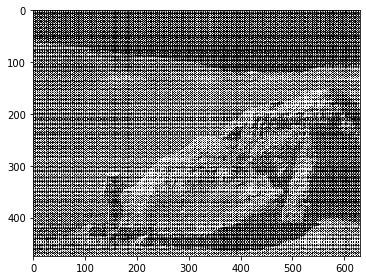

In [4]:
"""noise reduction"""
im = read_and_convert(img_path='./apollo 17_boulder_noisy.tif').astype(np.float32)
io.imshow(im)

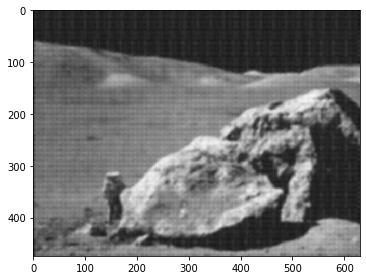

In [5]:
im = read_and_convert(img_path='./apollo 17_boulder_noisy.tif').astype(np.float32)
im = cv2.filter2D(im, -1, np.ones((5, 5))/25)
im = cv2.medianBlur(im, 5)
im = normalize(im)
im = cv2.GaussianBlur(im, (5,5), 3)

io.imshow(im)

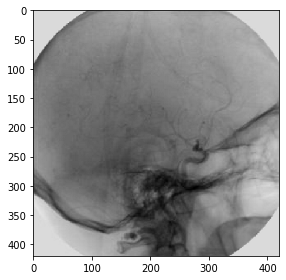

In [6]:
"""project2"""
"""(a)"""
live_img = read_and_convert(img_path='./angiography_live_ image.tif')
mask_img = read_and_convert(img_path='./angiography_mask_image.tif')
io.imshow(live_img)

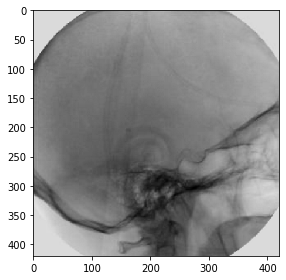

In [7]:
io.imshow(mask_img)

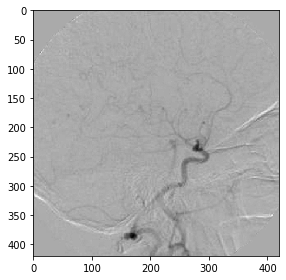

In [8]:
diff = normalize(live_img - mask_img)
io.imshow(diff)

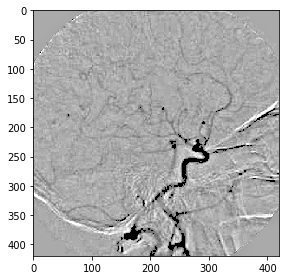

In [9]:
details = diff - cv2.GaussianBlur(diff, (67,67), 0)
sharp = diff + 2*details
enhanced = sharp
enhanced = np.clip(enhanced, 0, 1)
enhanced[enhanced<0.4] = 0
io.imshow(enhanced)

"It's normal and expected. The black and white part flipped, \nbecuase A-B and B-A has different signs for all of the items, \nafter normalizations, if one item of A-B is closer to 0, the \nother one will be closer to 1, so one of them appears darker and \nthe other one appears brighter"

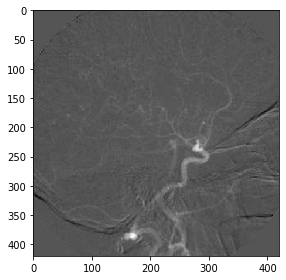

In [10]:
"""project2"""
"""(b)"""
reverse = normalize(- live_img + mask_img)
io.imshow(reverse)
"""It's normal and expected. The black and white part flipped, 
becuase A-B and B-A has different signs for all of the items, 
after normalizations, if one item of A-B is closer to 0, the 
other one will be closer to 1, so one of them appears darker and 
the other one appears brighter"""

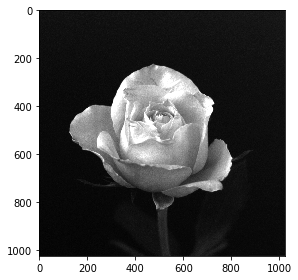

In [11]:
"""project3"""
im = io.imread('./rose1024.tif')
io.imshow(im)

In [12]:
def imageHist4e(f, mode='n'):
    histogram, bin_edges = np.histogram(f.ravel(), 256, [0, 256])
    if mode == 'n':
        histogram = histogram/histogram.sum()
    else:
        assert mode=='u'
    return histogram, bin_edges


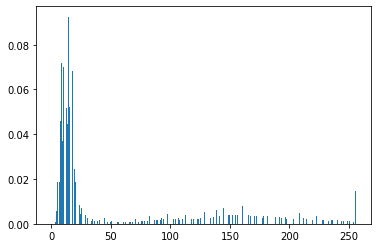

In [13]:
hist, bins = imageHist4e(im)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [14]:
"""Conclusion: the image seems to be very dark, there are a lot of 
low values, while the high values are rare, which means the majority 
of the image is dark. """

'Conclusion: the image seems to be very dark, there are a lot of \nlow values, while the high values are rare, which means the majority \nof the image is dark. '

In [15]:
"""project4"""
def centralMoments4e(f, n):
    if f.max() <= 1:
        f = f * 255
    p, bins = imageHist4e(f)
    u = []
    for idx in range(n):
        if idx == 0:
            u.append((bins[:-1]*p).sum())
        else:
            u.append(((bins[:-1]-f.mean())**(idx+1)*p).sum())
    return u
        


In [16]:
"""b"""
mean, var, thrid, fourth = centralMoments4e(im, 4)
print(mean, var, thrid, fourth)

46.789353370666504 4369.7566505271525 503521.5312762059 89457514.32732439


In [17]:
"""c"""
live_img = io.imread('./angiography_live_ image.tif')
mean, var, thrid, fourth = centralMoments4e(live_img, 4)
print(mean, var, thrid, fourth)

129.30586734693878 1856.3638998146025 15009.17211227573 10277438.981447637


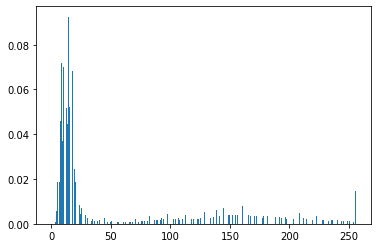

In [18]:
"""d"""
hist, bins = imageHist4e(im)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

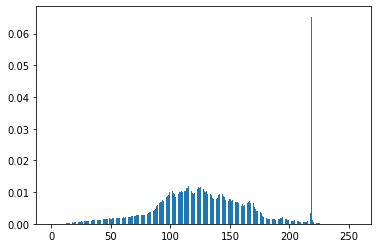

In [19]:
hist, bins = imageHist4e(live_img)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [20]:
"""e"""
"""mean of live image is higher than rose, which is 
the same on the plots where the middle part of the 
histogram of live is in the middle and the one of rose is 
on the left. The variance of rose is higher, while 
the one of live is lower, which is t he same becasue 
the tails of live image is shorter. The central moments
of live image is also smaller than rose, which is 
also reflected in the histograms
because the histogram of life looks less variant. """

'mean of live image is higher than rose, which is the same on the plots where\nthe middle part of the histogram of live is in the middle and the one of rose is \non the left. The variance of rose is higher, while the one of live is lower, \nwhich is t he same becasue the tails of live image is shorter. The central moments\nof live image is also smaller than rose, which is also reflected in the histograms\nbecause the histogram of life looks less variant. '